In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = (12,5)
plt.rcParams['axes.unicode_minus'] = False

# 1. 통계분석

### 1.1
- 종속변수인 Chance_of_Admit(입학허가확률)과 독립변수(GRE, TOEFL, Univ_Rating, SOP, LOR, CGPA)에 대해 피어슨 상관계수를 이용한 상관관계 분석 수행.
- 그래를 활용, 분석 결과를 설명하시오

<Axes: xlabel='Pearson 상관계수'>

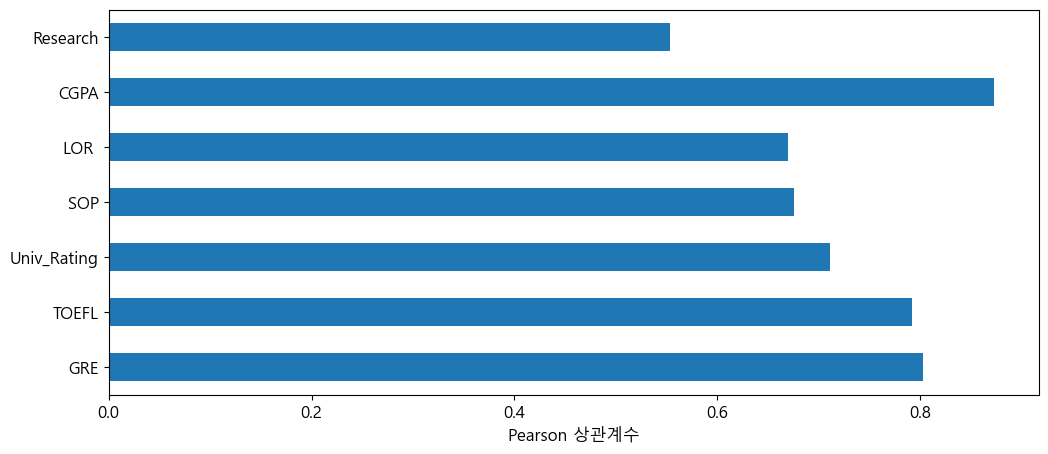

In [15]:
admit = pd.read_csv('Admission.csv')
admit_feat = admit.drop(['Chance_of_Admit'], axis=1)
df_corr = admit_feat.corrwith(admit.Chance_of_Admit, method='pearson')
df_corr.plot(kind='barh', xlabel='Pearson 상관계수')

# 각 독립변수 GRE, TOEFL, Univ_Rating, SOP, LOR, CGPA의 종속변수 Chance_of_Admit 과의 Pearson 상관관계를 아래와 같이 바그래프로 비교하였다.
# 모든 독립변수는 종속변수와 양의 상의 관계를 갖는 것으로 나타났으며, 특히 CGPA가 매우 상관관계가 높은 것으로 나타났다. 상대적으로 상관관계가 가장 약한 독립변수는 Research로 볼수 있다.

### 1.2
- 독립변수(GRE, TOEFL, Univ_Rating, SOP, LOR, CGPA, Research)가 Chance_of_Admit에 영향을 미치는지 알아보는 회귀분석을 단계적 선택법을 사용하여 수행하고 결과를 해석하시오.

In [50]:
import statsmodels.api as sm
from itertools import combinations

def stepwise_method_AIC(X, y):
    result = pd.DataFrame()
    feature_combis = []
    for i in range(1, len(X.columns)+1):
        feature_combis += list(combinations(X.columns, i))
    feature_combis.reverse()

    for j, combi in enumerate(feature_combis):
        X_ = X.filter(combi)
        X_ = sm.add_constant(X_)
        
        model = sm.OLS(y, X_)
        fitted = model.fit()
        n = fitted.nobs
        p = fitted.df_model

        if j==0:
            MSE_full = fitted.mse_resid #Full 모델의 MSE
        
        result.loc[j, 'feature_combi'] = ', '.join(list(fitted.params.keys()))
        result.loc[j, 'AIC'] = fitted.aic
        result.loc[j, 'BIC'] = fitted.bic
        result.loc[j, 'CP'] = sum((fitted.resid)**2)/MSE_full - (n-2*(p+1))
        result.loc[j, 'adj_R2'] = fitted.rsquared_adj

        result = result.sort_values(by='AIC', ascending=True)
        best = result.iloc[0, 0]
    return best, result


X = admit.drop(['Chance_of_Admit'], axis=1)
y = admit.Chance_of_Admit

best, result = stepwise_method_AIC(X, y)

print('total features : ', X.columns)
print('best features'' set : ', best)
print(result)

# AIC는 가능도(likelihood)에 기초한 값이지만 변수가 증가할수록 불이익을 적용한 값이다. 따라서 가능도가 같다면 적은 수의 특성을 사용하는 모델에 더 좋은 점수를 주도록 설계되었다.
# AIC는 낮을수록 더 좋은 모델인데, AIC가 가장 낮은 점수의 조합은 전체 특성을 모두 사용한 조합이다.

total features :  Index(['GRE', 'TOEFL', 'Univ_Rating', 'SOP', 'LOR ', 'CGPA', 'Research'], dtype='object')
best features set :  const, GRE, TOEFL, LOR , CGPA, Research
                                         feature_combi          AIC  \
19             const, GRE, TOEFL, LOR , CGPA, Research -1061.224621   
4    const, GRE, TOEFL, Univ_Rating, LOR , CGPA, Re... -1060.386155   
3         const, GRE, TOEFL, SOP, LOR , CGPA, Research -1059.283687   
0    const, GRE, TOEFL, Univ_Rating, SOP, LOR , CGP... -1058.746368   
15       const, GRE, Univ_Rating, LOR , CGPA, Research -1055.416599   
..                                                 ...          ...   
104                                   const, SOP, LOR   -714.489786   
124                                 const, Univ_Rating  -701.955757   
123                                         const, SOP  -663.941304   
122                                        const, LOR   -658.194963   
120                                    const, Rese

### 1.3
- 단계적 선택법을 사용해 변수를 선택한 후 새롭게 생성한 회귀모형에 대한 잔차분석을 수행하고, 그래프를 활용하여 결과를 해석하시오.

In [66]:
#-----------------------------------------------------------------
# 모델 생성 및 적합
#-----------------------------------------------------------------
import statsmodels.api as sm

y = admit.Chance_of_Admit
X = admit[['GRE', 'TOEFL','LOR ', 'CGPA', 'Research']]
X = sm.add_constant(X)

model = sm.OLS(y, X)
fitted = model.fit()

fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance_of_Admit   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     320.6
Date:                Thu, 28 Aug 2025   Prob (F-statistic):          2.04e-136
Time:                        22:29:56   Log-Likelihood:                 536.61
No. Observations:                 400   AIC:                            -1061.
Df Residuals:                     394   BIC:                            -1037.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2985      0.117    -11.070      0.000      -1.529      -1.068
GRE            0.0018      0.001      2.992      0.003       0.001       0.003
TOEFL          0.0030      0.001      2.847      0.005       0.001       0.005
LOR            0.0228      0.005      4.741      0.000       0.013       0.032
CGPA           0.1210      0.012     10.312      0.000       0.098       0.144
Research       0.0246      0.008      3.103      0.002       0.009       0.040
==============================================================================
Omnibus:                       87.489   Durbin-Watson:                   0.750
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.337
Skew:                          -1.157   Prob(JB):                     1.14e-39
Kurtosis:                       5.325   Cond. No.                     1.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1. 정규성 확인 --------------------------------
Jarque-bera : stats 179.337 , p-value 0.000
Skewness -1.157 , Kurtosis 5.325


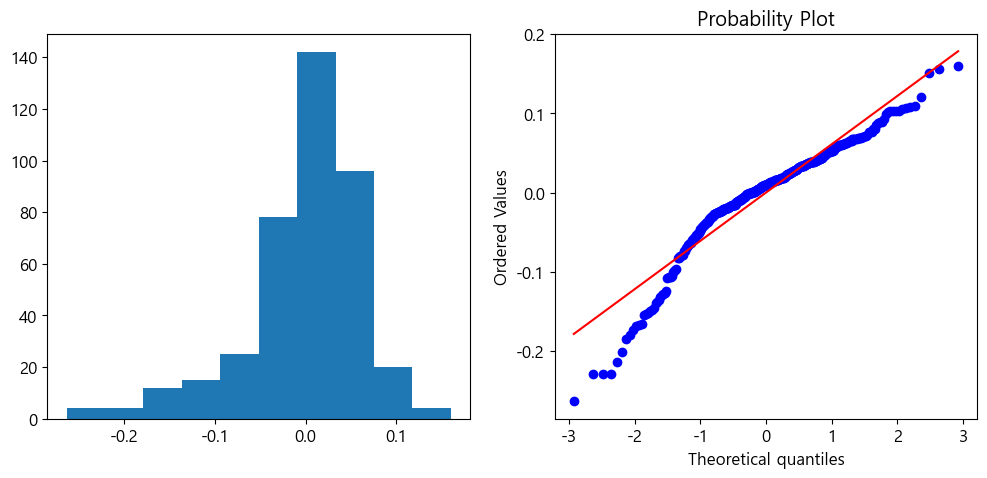

2. 등분산성 확인 --------------------------------


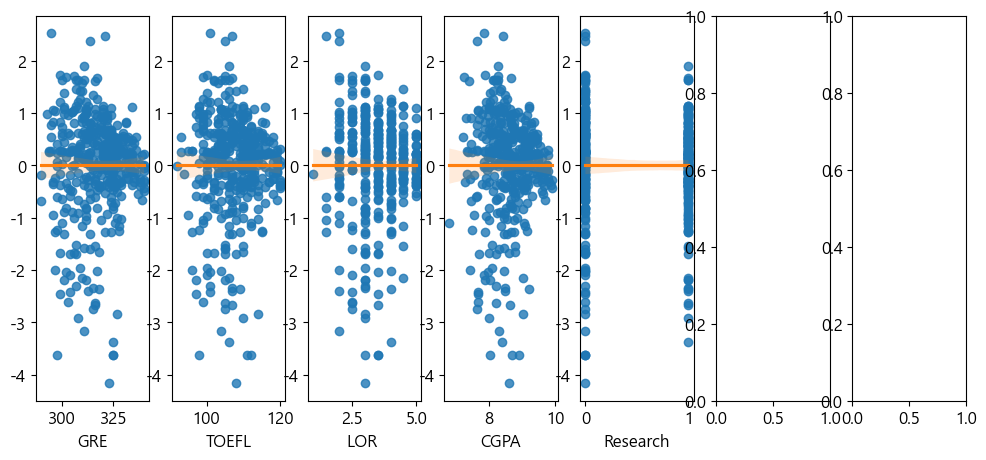

3. 독립성 확인 --------------------------------
durbin-watson stats 0.750


In [67]:
#-----------------------------------------------------------------
# 잔차 분석
#-----------------------------------------------------------------
import seaborn as sns
from scipy.stats import zscore, probplot
from statsmodels.stats.stattools import jarque_bera, durbin_watson

resid = fitted.resid
pred = fitted.fittedvalues
sresid = zscore(resid)

print("1. 정규성 확인 --------------------------------") 
stats, p, skew, kurt = jarque_bera(resid)
print('Jarque-bera : stats {:.3f} , p-value {:.3f}'.format(stats, p))
print('Skewness {:.3f} , Kurtosis {:.3f}'.format(skew, kurt))
# Jarque-bera 통계량이 0.01 유의수준에서 귀무가설이 기각된다. 즉, 정규분포와 차이가 있다.
# 데이터의 형태는 skewness가 -1.16으로 우측으로 다소 치우친 형태이고, kurtosis는 5.344로 다소 퍼진 형태를 보인다.

fig, ax = plt.subplots(1,2)
ax[0].hist(resid)
probplot(resid, plot=ax[1])
plt.show()

print("2. 등분산성 확인 --------------------------------") 
cols = X.columns.to_list()
cols.remove('const')
fig, ax = plt.subplots(1, 7)
for feature, ax in zip(cols, ax.ravel()):
    sns.regplot(x=X[feature], y=sresid, line_kws={"color":'C1'}, ax=ax)
plt.show()
# 각 특성과 잔차 간의 분포를 볼 때 어떤 상관관계 없이 등분산성이 확인된다.

print("3. 독립성 확인 --------------------------------") 
dw = durbin_watson(resid)
print('durbin-watson stats {:.3f}'.format(dw))
# durbin-watson 통게량은 2에 가까울 때 잔차 간 독립이고, 0에 가까우면 양의 상관, 4에 가까우면 음의 상관을 갖는다.
# 통계량이 0.759이므로 0에 가까워 양의 상관이 있다고 볼 수 있다.

# 2. 정형 데이터마이닝

### 2.1
- cabin, embarked의 값 중 ""로 처리된 값을 NA로 바꾸고 아래의 테이블을 보고 문자형, 범주형 변수들을 각각 character, factor형으로 변환하시오.
- 수치형 변수가 NA인 값을 중앙값으로 대체하고, 범주형 변수가 NA인 값을 최대값으로 대체하고, age변수를 아래의 표와 같이 구간화하여 age_1이라는 변수를 생성하고 추가하시오.

### 2.2
- 전처리가 완료된 titatic 데이터를 train:test = 7:3 데이터로 분할하시오.
- train 데이터로 종속변수인 survived를 독립변수 pclass, sex, sibsp, parch, fare, embarked로 지정하여 예측하는 분류모델을 3개 이상 생성하고, test 데이터에 대한 예측값을 csv파일로 각각 제출하시오.

### 2.3
- 생성된 3개의 분류모델에 대해 성과분석을 실시하여 정확도를 비교하여 설명하시오. 또 ROC curve를 그리고 AUC값을 산출하시오.

In [ ]:
2.3 